In [1]:
import numpy as np
from math import e
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from tqdm import tqdm
%matplotlib inline

---

### Define all model functions (see other notebooks for more detailed walkthrough)

In [2]:
## Define the main activation function of our neural network (sigmoid for binary classification)
def sigmoid(x):
    return 1 / (1 + e ** -x)

In [3]:
## Define function for the feed forward neural network calculation with one hidden layer
def feed_forward_sigmoid(X, w0, w1):
    """Returns the hidden layer and the output layer of a FFNN model"""
    
    ## step 1: X data is (50,2)
    
    ## step 2: add a bias columns, so X turns from (50,2) to (50,3) with added 1s
    X = np.hstack((X,np.ones((X.shape[0],1))))
    
    ## step 3: dot product of X with weights0
    d1 = np.dot(X, w0)
    
    ## step 4: apply sigmoid activation function to each value in d1
    s1 = sigmoid(d1)
    
    ## step 5: add bias column to the hidden layer -> this makes it (50,3), incl. bias
    h0 = np.hstack((s1, np.ones((s1.shape[0],1))))
    
    ## step 6: dot pdocut of hidden layer h1 and weights1
    d2 = np.dot(h0, w1)
    
    ## step 7: apply sigmoid function to get the output layer
    o2 = sigmoid(d2)
    
    ## Return the hidden layer and the output layer
    return h0, o2

In [4]:
## Define function to predict results from output layer probabilities
def predict(output_probabilities):
    return np.array([int(np.round(x)) for x in output_probabilities])

In [5]:
## Define the error of prediction
def error(ytrue, ypred):
    return ytrue - ypred

In [6]:
## Define loss function to be used for optimization
def logloss(ytrue, yprob):
    return -(ytrue*np.log(yprob)+(1-ytrue)*np.log(1-yprob))

In [7]:
## Define function that will take the derivative of our activation function (sigmoid)
def sigmoid_derivative(yhat):
    """Returns the values of sig'(yhat)"""
    sig = sigmoid(yhat)
    return sig*(1-sig)

In [8]:
## Calculate the gradient from a derivative, logloss function and error as inputs
def gradient(derivative, logloss, error):
    return derivative * logloss * error

In [9]:
## Calculate the weight_delta
def weight_delta(gradient, output_layer, learning_rate):
    return -np.dot(gradient, output_layer) * learning_rate

In [10]:
## Define backpropagation function to calculate adjusted weights of the network
## This function only runs one epoch of backpropagation

def backpropagation(X, y, w0, w1, LR0=0.01, LR1=0.001):
    """ Runs backpropagation on feed-forward neural network once and returns
        adjusted weights after the epoch."""
    #1) Run network and calculate hidden layer and output layer
    hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
    y_prob = y_prob.flatten()
    y_pred = predict(y_prob)

    #2) Calculate error with logloss function
    lloss = logloss(y, y_prob)

    #3) Calculate error to determine the direction of the gradient
    err = error(y, y_prob)

    #4) Take sigmoid derivative
    sigm_prime = sigmoid_derivative(y_prob)

    #5) Calculate the gradient of the output layer
    grad1 = np.dot(sigm_prime, lloss) * err

    #6) Calculate weights delta for the output layer (w1)
    w1_delta = np.dot(grad1, hidden_layer) * LR1

    #7) Calculate gradient of hidden layer
    X_biased = np.hstack((X, np.ones((X.shape[0],1))))
    grad0 = 1 * grad1 * w1[:2]

    #8) Calculate weights delta for the hidden layer (w2)
    w0_delta = np.dot(grad0, X_biased).T * LR0

    #9) Calculate the updated output layer weights (w1)
    w1 = w1 + w1_delta.reshape(3,1)

    #10) Calculate the updated hidden layer weights (w0)
    w0 = w0 + w0_delta

    return w0, w1

---

### TESTING TIME 

In [11]:
#Initialize data and weights
np.random.seed(42)
X, y = make_moons(n_samples=150, noise=0.3, random_state=42)
w0 = np.random.rand(3,2)
assert w0.shape == (3,2)
w1 = np.random.rand(3,1)
assert w1.shape == (3,1)

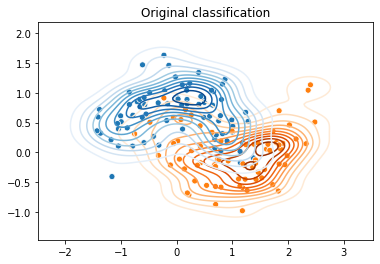

In [12]:
ones = X[y == 1]
zeros = X[y != 1]
ax = sns.kdeplot(ones[:,0], ones[:,1], cmap="Oranges")
ax = sns.kdeplot(zeros[:,0], zeros[:,1], cmap="Blues")
ax = sns.scatterplot(X[:,0], X[:,1], hue=y, legend=False)
ax = plt.title('Original classification')

---

#### Let's run one epoch of backpropagation and see how the prediction looks 

In [13]:
w0, w1 = backpropagation(X, y, w0, w1)
hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
y_pred_1 = predict(y_prob).flatten()

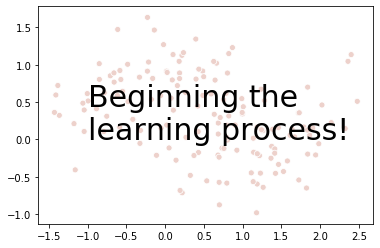

In [14]:
ones = X[y_pred_1 == 1]
zeros = X[y_pred_1 != 1]
#_ = sns.kdeplot(ones[:,0], ones[:,1], cmap="Oranges")
#_ = sns.kdeplot(zeros[:,0], zeros[:,1], cmap="Blues")
_ = sns.scatterplot(X[:,0], X[:,1], hue=y_pred_1, legend=False)
_ = plt.title("")
_ = plt.text(-1, 0, 'Beginning the \nlearning process!', dict(size=30))
_ = plt.savefig(fname = '../Output/backprop_learning_start.png')

---

#### Let's run 500 epochs and see what our neural network has learnt

In [15]:
for i in range(500):
    w0, w1 = backpropagation(X, y, w0, w1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
## Calculate new predictions
hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
y_pred = predict(y_prob).flatten()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


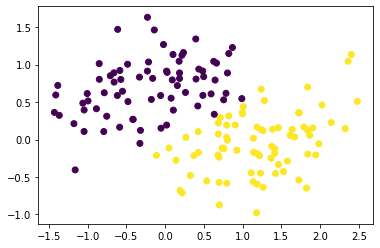

In [17]:
## Plot the prediction results
_ = plt.scatter(X[:,0], X[:,1], c=y_pred)

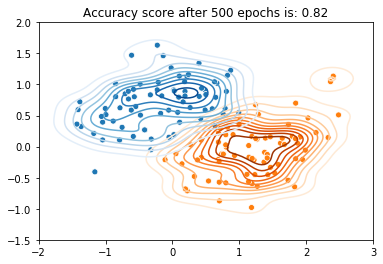

In [18]:
ones = X[y_pred == 1]
zeros = X[y_pred != 1]
_ = sns.kdeplot(ones[:,0], ones[:,1], cmap="Oranges")
_ = sns.kdeplot(zeros[:,0], zeros[:,1], cmap="Blues")
_ = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, legend=False)
_ = plt.ylim(-1.5, 2)
_ = plt.xlim(-2,3)
_ = plt. title(f'Accuracy score after 500 epochs is: {accuracy_score(y_pred, y)}')

---

#### Create a GIF visualising the learning process 

In [19]:
#Initialize data and weights again
np.random.seed(42)
X, y = make_moons(n_samples=150, noise=0.3, random_state=42)
w0 = np.random.rand(3,2)
assert w0.shape == (3,2)
w1 = np.random.rand(3,1)
assert w1.shape == (3,1)

In [21]:
epochs = 100

In [22]:
pred_hist = []
loss_hist = []
score_hist = []

for i in tqdm(range(epochs)):
    ## Run backprop to adjust weights
    w0, w1 = backpropagation(X, y, w0, w1)
    ## Run neural net to get prediction
    hidden_layer, y_prob = feed_forward_sigmoid(X, w0, w1)
    y_pred = predict(y_prob).flatten()
    sloss = sum(logloss(y, y_prob.flatten()))
    acc = accuracy_score(y_pred, y)
    ## Store results
    pred_hist.append(y_pred)
    loss_hist.append(sloss)
    score_hist.append(acc)
    ## Plotting the results
    ones = X[y_pred == 1]
    zeros = X[y_pred != 1]
    _ = sns.kdeplot(ones[:,0], ones[:,1], cmap="Oranges")
    _ = sns.kdeplot(zeros[:,0], zeros[:,1], cmap="Blues")
    _ = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, legend=False)
    _ = plt.ylim(-1.5, 2)
    _ = plt.xlim(-2,3)
    _ = plt. title(f'Accuracy score after {i+1:3} epoch(s) is: {accuracy_score(y_pred, y):.2f}')
    _ = plt.savefig(fname = '../Output/backprop_learning_{}.png'.format(i))
    _ = plt.close()

100%|██████████| 100/100 [00:00<00:00, 566.00it/s]


In [ ]:
# Generate the closing image
ones = X[y_pred == 1]
zeros = X[y_pred != 1]
#_ = sns.kdeplot(ones[:,0], ones[:,1], cmap="Oranges",)
#_ = sns.kdeplot(zeros[:,0], zeros[:,1], cmap="Blues")
_ = sns.scatterplot(X[:,0], X[:,1], hue=y_pred, legend=False)
_ = plt.ylim(-1.5, 2)
_ = plt.xlim(-2,3)
_ = plt.title(f'Accuracy score after {i+1:3} epoch(s) is: {accuracy_score(y_pred, y):.2f}')
_ = plt.text(-1.7, -0.2, 'Learning process \nfinished...', dict(size=35))
_ = plt.savefig(fname = '../Output/backprop_learning_closing.png')
_ = plt.close()

In [62]:
import imageio
import os
images = []

In [ ]:
## Load 5 frames of the starting image
filename = '../Output/backprop_learning_start.png'
for i in range(5):
    images.append(imageio.imread(filename))

In [ ]:
## Loading the learning images
for i in range(epochs):
    filename = '../Output/backprop_learning_{}.png'.format(i)
    images.append(imageio.imread(filename))
    #os.remove('../Output/backprop_learning_{}.png'.format(i))

In [ ]:
## Loading the ending image
filename = '../Output/backprop_learning_closing.png'
for i in range(3):
    images.append(imageio.imread(filename))

In [ ]:
##
filename = '../Output/backprop_learning_99.png'
for i in range(5):
    images.append(imageio.imread(filename))

In [ ]:
imageio.mimsave('../Output/learning.gif', images, fps=5)

---

#### Creating gif for loss curve

In [64]:
images = []

In [65]:
## Generate initial 5 frames of the gif
i = 0
for b in range(5):
    a = 1 - i / 40
    b = -0.2 + i / 40
    _ = plt.plot(loss_hist)
    _ = plt.scatter(i,loss_hist[i])
    _ = plt.annotate(f'{round(loss_hist[i])}', xy=(i,loss_hist[i]), xytext=(i+a, loss_hist[i]+b))
    _ = plt.savefig(fname = '../Output/backprop_loss.png')
    _ = plt.close()
    images.append(imageio.imread('../Output/backprop_loss.png'))
    os.remove('../Output/backprop_loss.png')

In [66]:
## Generate the main part of the gif (the learning process)
for i in tqdm(range(100)):
    ## Text offset parameters
    a = 1 - i / 40
    b = -0.2 + i / 40
    _ = plt.plot(loss_hist)
    _ = plt.scatter(i,loss_hist[i])
    _ = plt.annotate(f'{round(loss_hist[i])}', xy=(i,loss_hist[i]), xytext=(i+a, loss_hist[i]+b))
    _ = plt.savefig(fname = '../Output/backprop_loss.png')
    _ = plt.close()
    images.append(imageio.imread('../Output/backprop_loss.png'))
    os.remove('../Output/backprop_loss.png')

100%|██████████| 100/100 [00:13<00:00,  5.77it/s]


In [67]:
## Generate last 8 frames of the gif
i = 99
for b in range(8):
    a = 1 - i / 40
    b = -0.2 + i / 40
    _ = plt.plot(loss_hist)
    _ = plt.scatter(i,loss_hist[i])
    _ = plt.annotate(f'{round(loss_hist[i])}', xy=(i,loss_hist[i]), xytext=(i+a, loss_hist[i]+b))
    _ = plt.savefig(fname = '../Output/backprop_loss.png')
    _ = plt.close()
    images.append(imageio.imread('../Output/backprop_loss.png'))
    os.remove('../Output/backprop_loss.png')

In [68]:
## Export it as a gif
imageio.mimsave('../Output/losses.gif', images, fps=5)